# # 언어 판별 프로그램

- os.path.basename(): 입력받은 경로의 기본 이름(base name)을 반환
- match() 메서드: 문자열의 처음부터 정규식과 매치되는지 조사
- group(): match 객체의 메서드. 매치된 문자열을 리턴함
- {2,}:반복횟수가2이상인경우

- ord(): 문자를 아스키(ASCII) 코드 번호로 변환 함수

- 단순히알파벳의개수로하지않는이유

    만약에 기사가 특정 기사보다 2배로 길다면, 그만큼 많은 글이 쓰여있을 것이고, 그에 해당하는 알파벳 또한 2배정도로 더 많이 출현할 것이므로 텍스트 파일에 있는 문자 수가 다르므로 출현 횟수를 비교하면 동일한 규칙이 적용되지 않기 때문
    
    이를 정규화(normalize)라고 부르며, 해당 이유로 정규화(normalize)라는 기법을 이용해야 함

In [1]:
from sklearn import svm, metrics
import glob, os.path, re, json

In [2]:
# 텍스트를 읽어 들이고 출현 빈도 조사하기

def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    
    with open(fname, "r", encoding ="utf-8") as f:
        text = f.read()
    text = text.lower() # 소문자 변환
    
    # 숫자 세기 변수(cnt) 초기화하기
    cnt = [0 for n in range(0,26)]
    
    code_a = ord("a")
    code_z = ord("z")
    
    # 알파벳 출현 횟수 구하기
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n - code_a] += 1
            
    # 정규화하기
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    
    return (freq, lang)

In [8]:
# 각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
        
    return {"freqs":freqs, "labels":labels}

data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")

In [9]:
# 이후를 대비해서 JSON으로 결과 저장하기

with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

- glob.glob(): 디렉터리에 있는 파일들을 리스트로 만들어 리턴 • json.dump(): 데이터를 JSON 포맷으로 인코딩함

In [10]:
# 학습하기
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# 예측하기
predict = clf.predict(test["freqs"])

In [12]:
# 결과 테스트하기
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)

print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

정답률 = 0.875
리포트 =
             precision    recall  f1-score   support

         en       0.67      1.00      0.80         2
         fr       1.00      1.00      1.00         2
         id       1.00      0.50      0.67         2
         tl       1.00      1.00      1.00         2

avg / total       0.92      0.88      0.87         8



# # 데이터마다의 분포를 그래프로 확인하기

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import json

### (1) 알파벳 출현 빈도 데이터 읽어 들이기

In [15]:
# 이후를 대비해서 JSON으로 결과 저장하기

with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

### (2) 언어마다 계산하기

- enumerate 함수

    리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능
    
    enumerate는 “열거하다”라는 뜻이다. 이 함수는 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴
    
    보통 enumerate 함수는 아래 예제처럼 for문과 함께 자주 사용됨

In [17]:
lang_dic = {}

for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
        
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

In [18]:
lang_dic

{'en': [0.07862044537042095,
  0.017608945764586756,
  0.03614291848080546,
  0.03831451940541013,
  0.1280730727390625,
  0.016649613692323727,
  0.02705248110151802,
  0.03230504934638093,
  0.07872048011446706,
  0.0024511785116498146,
  0.007166187866433225,
  0.04741120085108196,
  0.024145502700853992,
  0.06288384005786753,
  0.07437577201317366,
  0.019614834903663274,
  0.003208220472484013,
  0.07649767969640853,
  0.07379931869167551,
  0.08102221517591979,
  0.028900481748630576,
  0.013771507429552146,
  0.014434523751604382,
  0.001802103986607091,
  0.014389989789255495,
  0.0006379163381634782],
 'fr': [0.07646246064551945,
  0.01380194004839181,
  0.035956021450875675,
  0.04666988003580362,
  0.14969025236132688,
  0.0118619163379322,
  0.01241795753866967,
  0.013494765015921967,
  0.07477608855354578,
  0.0027199367601383265,
  0.0018894820040003726,
  0.06286208991701384,
  0.032823338468148125,
  0.07257089865718583,
  0.05800213928274973,
  0.028456876339355897,


### (3) Pandas의 DataFrame에 데이터 넣기

In [20]:
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic, index = asclist)

In [21]:
df

,en,fr,id,tl
a,0.078620,0.076462,0.143917,0.215725
b,0.017609,0.013802,0.028470,0.022360
c,0.036143,0.035956,0.011012,0.009065
d,0.038315,0.046670,0.036799,0.015920
e,0.128073,0.149690,0.091711,0.031863
f,0.016650,0.011862,0.007415,0.003200
g,0.027052,0.012418,0.049518,0.086776
h,0.032305,0.013495,0.016180,0.017125
i,0.078720,0.074776,0.099914,0.083303
j,0.002451,0.002720,0.005221,0.001311


### (4) 그래프 그리기

- plt.style.use(‘ggplot’): ‘ggplot’ 스타일 사용


- DataFrame.plot(): matplotlib을 이용해 데이터프레임의 plot을 만듦

        kind: line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 

        subplots: 각각의 컬럼별로 별도의 subplot을 만듦

        ylim: y축 범위 조정, ex) (0, 0.15)는 0에서 0.15까지


- matplotlib.pyplot.savefig(): 현재의 이미지를 저장

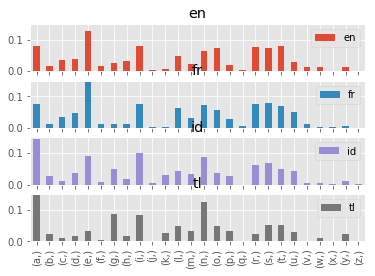

In [28]:
%matplotlib inline

plt.style.use('ggplot')
df.plot(kind="bar", subplots = True, ylim=(0, 0.15))
plt.savefig("lang-plot.png")

In [29]:
df

,en,fr,id,tl
a,0.078620,0.076462,0.143917,0.215725
b,0.017609,0.013802,0.028470,0.022360
c,0.036143,0.035956,0.011012,0.009065
d,0.038315,0.046670,0.036799,0.015920
e,0.128073,0.149690,0.091711,0.031863
f,0.016650,0.011862,0.007415,0.003200
g,0.027052,0.012418,0.049518,0.086776
h,0.032305,0.013495,0.016180,0.017125
i,0.078720,0.074776,0.099914,0.083303
j,0.002451,0.002720,0.005221,0.001311


<function matplotlib.pyplot.show>

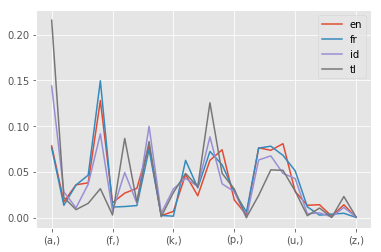

In [30]:
plt.style.use('ggplot')
df.plot(kind="line")
plt.show

# # SVM

In [31]:
import random

#### BMI를 계산해서 레이블을 리턴하는 함수

In [32]:
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    
    if bmi < 18.5 : return "thin"
    if bmi < 25 : return "normal"
    
    return "fat"

#### 출력 파일 준비하기

In [98]:
fp = open("bmi.csv", "w", encoding = "utf-8")
fp.write("height,weight,label\r\n")

21

#### 무작위로 데이터 생성하기

 randint(최소, 최대) : 입력 파라미터인 최소부터 최대까지 중 임의의 정수를 리턴

In [99]:
cnt = {"thin":0, "normal": 0, "fat": 0}

for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))

fp.close()

print("ok,", cnt)

ok, {'fat': 7648, 'normal': 5930, 'thin': 6422}


# SVM을 실제로 사용해보기

- C:오류페널티매개변수,(기본값=1.0)
- cash_size: 커널의 캐시 크기(MB)를 지정
- class_weight: 클래스 i의 매개 변수 C를 SVC의 경우 class_weight [i] * C로 설정합니다. 주어지지 않으면, 모든 클래스는 가중치 1을 가짐. "balanced“ 모드는 y의 값을 사용하여 입력 데이터의 클래스 빈도에 반비례하는 가중치를 자동으로 조정 (n_samples / (n_classes * np.bincount(y)))
- coef0: 커널 함수의 독립 용어. 'poly'및 'sigmoid' 에서만 의미가 있음 (기본값 = 0.0)
- decision_function_shape: one-vs-rest (‘ovr’), (n_samples, n_classes) , or the original one-vs-one (‘ovo’),(n_samples, n_classes * (n_classes - 1) / 2) (기본값 = ‘ovr)
- degree: 다항('poly') 커널 함수의 차수. 다른 모든 커널에서는 무시됨(기본값 = 3)
- gamma: 'rbf', 'poly'및 'sigmoid'에 대한 커널 계수. 감마가 '자동'이면 1 / n_features가 대신 사용됩니다.
- kernel: 알고리즘에 사용할 커널 유형(‘linear', ‘poly’, ‘rbf’, ‘sigmoid‘ 등)을 지정, (기본값 = ‘rbf’)
- max_iter: 반복횟수 제한. -1은 무한을 의미함 (기본값 = -1)
- probability: 확률 추정 가능 여부. fit 메서드를 호출하기 전에 사용 가능하며 사용할 경우 속도가 느려짐(default=False)
- random_state: 데이터를 셔플 할 때 사용할 의사(pseudo) 난수 생성 프로그램의 시드(기본값 = none)
- shrinking: 수축 추론(shrinking heuristic)을 사용할 지 여부(기본값=True)
- tol: 계산을 정지시키는 허용 오차(기본값 = 1e-3)
- verbose: 자세한 출력을 사용함

In [100]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### (1) 키와 몸무게 데이터 읽어 들이기

In [101]:
tbl = pd.read_csv("bmi.csv")

### (2) 칼럽(열)을 자르고 정규화하기

In [102]:
tbl

,height,weight,label
0,131,53,fat
1,140,43,normal
2,169,68,normal
3,141,50,fat
4,171,37,thin
5,199,57,thin
6,181,51,thin
7,165,37,thin
8,148,44,normal
9,143,56,fat


In [103]:
tbl.head()

,height,weight,label
0,131,53,fat
1,140,43,normal
2,169,68,normal
3,141,50,fat
4,171,37,thin


In [104]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
height    20000 non-null int64
weight    20000 non-null int64
label     20000 non-null object
dtypes: int64(2), object(1)
memory usage: 468.8+ KB


In [106]:
label = tbl["label"]
w = tbl["weight"]/100 # 최대 100kg이라고 가정
h = tbl["height"]/200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)

### (3) 학습 전용 데이터와 테스트 전용 데이터로 나누기

In [107]:
data_train, data_test, label_train, label_test = train_test_split(wh, label)

### (4) 데이터 학습하기

In [108]:
clf = svm.SVC()
clf.fit(data_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### (5) 데이터 예측하기

In [109]:
predict = clf.predict(data_test)

### (6) 결과 테스트하기

In [110]:
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9852
리포트 =
              precision    recall  f1-score   support

        fat       1.00      0.99      0.99      1914
     normal       0.96      1.00      0.98      1456
       thin       1.00      0.97      0.98      1630

avg / total       0.99      0.99      0.99      5000



## # 데이터 분포 확인하기

- matplotlib.pyplot.figure(): 새 그림을 생성
- Add_subplot():서브플롯추가.매개변수는서브플롯의위치를설명하는3자리정수.3개의정수가R,C및P
순으로 정렬 된 경우 서브 플롯은 R 행과 C 열이 있는 표에서 P 번째 위치를 취함
- DataFrame.loc(): 라벨값 기반의 2차원 인덱싱. label 을 통해 값을 찾을 수 있음. integer position로는 찾을 수 없음
- matplotlib.pyplot.scatter(): 다양한 마커 크기 및 색상을 가진 y대 x의 산점도
- x,y:데이터위치
- c: 색상 (기본값=‘b’)
- ax.legend(): 범례 추가

In [111]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

#### Pandas로 CSV 파일 읽어 들이기

In [112]:
tbl = pd.read_csv("bmi.csv", index_col=2)

In [113]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, fat to normal
Data columns (total 2 columns):
height    20000 non-null int64
weight    20000 non-null int64
dtypes: int64(2)
memory usage: 468.8+ KB


In [114]:
tbl.head()

,height,weight
label,,
fat,131,53
normal,140,43
normal,169,68
fat,141,50
thin,171,37


#### 그래프 그리기 시작

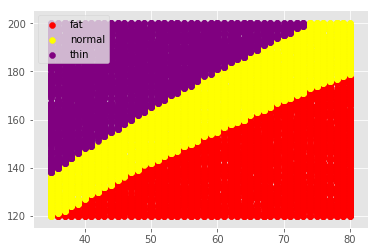

In [115]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"], b["height"], c=color, label=lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()
plt.savefig("bmi-test.png")